# Factor Graph
A **Factor Graph** is a bipartite graph that represents the factorization of a function. A bipartite graph is a graph in which the vertex set, $V$, can be partitioned into two subsets, $X$ and $Y$, such that each edge of the graph has one vertex in X and one vertex in Y . In a factor graph, there are two types of nodes:

1. **Variable Nodes**: Represent variables in your model, $x, y, z $ are the variables.
2. **Factor Nodes**: Represent factors or functions that operate on one or more of these variables, $f_1$  is a factor involving variables $x$ and $y$, $f_2$  is a factor involving variables $y$ and $z$.
 
Function <img src="https://latex.codecogs.com/svg.latex?f%28x%2C%20y%2C%20z%29" alt="https://latex.codecogs.com/svg.latex?f(x, y, z) " /> that can be factorized as: <img src="https://latex.codecogs.com/svg.latex?f%28x%2C%20y%2C%20z%29%20%3D%20f_1%28x%2C%20y%29%20%5Ctimes%20f_2%28y%2C%20z%29" alt="https://latex.codecogs.com/svg.latex? f(x, y, z) = f_1(x, y) \times f_2(y, z) " />

The **variables** represent the **unknown random** variables in the estimation problem, whereas the **factors** represent **probabilistic constraints** on those variables, derived from measurements or prior knowledge.

The factor graph will have three variable nodes for $x, y, z$, and two factor nodes for $f_1, f_2$.


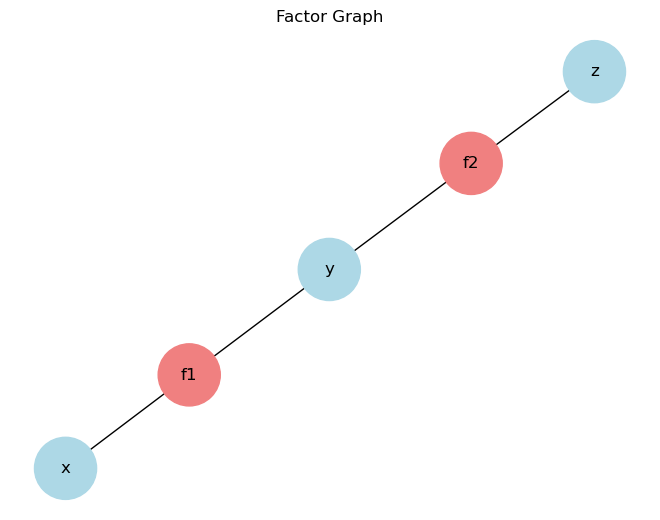

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G = nx.Graph()

# Add variable nodes
variables = ["x", "y", "z"]
G.add_nodes_from(variables, color="lightblue")

# Add factor nodes
factors = ["f1", "f2"]
G.add_nodes_from(factors, color="lightcoral")

# Add edges between factors and their corresponding variables
G.add_edges_from([("f1", "x"), ("f1", "y"), ("f2", "y"), ("f2", "z")])

# Draw the graph
colors = ["lightblue" if n in variables else "lightcoral" for n in G.nodes()]
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=2000)
plt.title("Factor Graph")
plt.show()


In the visualized graph, you'll see:
- Blue nodes represent variables (x, y, z).
- Red nodes represent factors (f1, f2).
- Edges connect factors to the variables they involve.




Refs: [1](https://www.youtube.com/watch?v=tm4E1o11kGo), [2](https://www.youtube.com/watch?v=JmR2YpkLNt0), [3](https://www.youtube.com/watch?v=Q313pTMAdcM), [4](https://www.youtube.com/watch?v=zOr9HreMthY)

# **Algorithms in Factor Graphs**


## **1.Optimization Algorithms**:
   Factor graphs are often solved by minimizing a cost function derived from negative log-likelihoods.
   - **Gauss-Newton Method**: Iterative nonlinear optimization for least-squares problems.
   - **Levenberg-Marquardt Algorithm (LMA)**: Combines Gauss-Newton with gradient descent for robustness.
   - **Gradient Descent**: For large-scale problems or when derivatives are difficult to compute.



In factor graphs, **optimization** aims to find the best estimate of the variables (e.g., robot poses, landmark positions) that maximizes the posterior probability of the model given the measurements or minimizes a cost function derived from the factor graph.

---

#### **What Are We Optimizing?**
We optimize the **posterior probability** of the variables $ X $ given the measurements $ Z $:
$
p(X | Z) \propto p(Z | X) p(X)
$
Where:
- $ p(Z | X) $: Likelihood of the measurements given the variables (constraints derived from sensor data, odometry, etc.).
- $ p(X) $: Prior probability of the variables (e.g., initial pose or smoothness assumptions).

This is equivalent to **minimizing the negative log-posterior**:
$
\hat{X} = \arg\min_X -\log p(X | Z)
$

---




#### **Factor Graph Representation**
The factor graph represents the joint probability distribution as a product of factors:
$
p(X, Z) \propto \prod_i \phi_i(X)
$
Each factor $ \phi_i(X) $ models a constraint:
- Measurements (e.g., sensor readings).
- Priors (e.g., initial pose).

---

#### **Optimization Objective**
The negative log of the posterior can be expressed as a **nonlinear least-squares problem**:
$
\hat{X} = \arg\min_X \sum_i \| r_i(X) \|^2_{\Sigma_i}
$
Where:
- $ r_i(X) $: Residual or error term of the $ i $-th factor.
- $ \Sigma_i $: Covariance (weight) of the $ i $-th factor.
- $ \| r_i(X) \|^2_{\Sigma_i} = r_i(X)^T \Sigma_i^{-1} r_i(X) $: Weighted squared error.

#### **Residuals in SLAM**
Residuals $ r_i(X) $ quantify the difference between predicted and observed values for each constraint:
1. **Odometry Factor** (robot motion model):
   $
   r_{\text{odom}}(X_k, X_{k+1}) = \text{odometry measurement} - \text{predicted relative pose}
   $

2. **Landmark Measurement Factor**:
   $
   r_{\text{landmark}}(X_k, L_j) = \text{observed landmark position} - \text{predicted position from robot pose}
   $

3. **Prior Factor**:
   $
   r_{\text{prior}}(X_0) = \text{initial pose} - \text{predicted pose}
   $

---

#### **Complete Cost Function**
Combining all residuals, the total cost function is:
$ J(X) = \sum_k \| r_{\text{odom}}(X_k, X_{k+1}) \|^2_{\Sigma_{\text{odom}}} + \sum_j \| r_{\text{landmark}}(X_k, L_j) \|^2_{\Sigma_{\text{landmark}}}
+ \| r_{\text{prior}}(X_0) \|^2_{\Sigma_{\text{prior}}} $
The optimization minimizes $ J(X) $, giving the best estimates for $ X $ (poses and landmarks).

---

#### **Example: 2D SLAM**
##### Problem Setup:
- **Variables**: Robot poses $ X_k = [x_k, y_k, \theta_k] $ and landmarks $ L_j = [l_{x,j}, l_{y,j}] $.
- **Factors**:
  - Odometry measurements: $ Z_{\text{odom},k} $.
  - Landmark observations: $ Z_{\text{landmark},j} $.
  - Prior on the initial pose.

##### Residuals:
1. **Odometry Factor**:
   $
   r_{\text{odom},k} = \begin{bmatrix} x_{k+1} - (x_k + \Delta x) \\ y_{k+1} - (y_k + \Delta y) \\ \theta_{k+1} - (\theta_k + \Delta \theta) \end{bmatrix}
   $
   Where $ \Delta x, \Delta y, \Delta \theta $ are derived from $ Z_{\text{odom},k} $.

2. **Landmark Observation**:
   $
   r_{\text{landmark},j} = \begin{bmatrix} l_{x,j} - (x_k + d \cos(\theta_k + \alpha)) \\ l_{y,j} - (y_k + d \sin(\theta_k + \alpha)) \end{bmatrix}
   $
   Where $ d, \alpha $ are derived from $ Z_{\text{landmark},j} $.

3. **Prior**:
   $
   r_{\text{prior}} = X_0 - \text{prior value}
   $

##### Cost Function:
$
J(X) = \sum_k \| r_{\text{odom},k} \|^2 + \sum_j \| r_{\text{landmark},j} \|^2 + \| r_{\text{prior}} \|^2
$

##### Optimization:
- Solve using iterative methods like Gauss-Newton or Levenberg-Marquardt.
- Linearize residuals and solve the linearized system to update $ X $ iteratively.

---


A **simple numerical example** of optimizing a factor graph with a few states and landmarks using the principles mentioned above.

---

### **Problem Setup**
#### Variables:
- Robot poses: $ X_0 = [0, 0, 0] $, $ X_1 = [1, 0, 0] $, $ X_2 = [2, 0, 0] $ (initial guess).
- Landmarks: $ L_1 = [1, 1] $, $ L_2 = [3, 1] $ (initial guess).

#### Measurements:
1. **Odometry Measurements**:
   - $ Z_{\text{odom}, 0\rightarrow1} = [1, 0] $ (robot moves 1 unit forward).
   - $ Z_{\text{odom}, 1\rightarrow2} = [1, 0] $.

2. **Landmark Observations**:
   - At $ X_1 $: $ Z_{\text{landmark}, L_1} = [1, 1] $.
   - At $ X_2 $: $ Z_{\text{landmark}, L_2} = [1, 1] $.

3. **Prior on Initial Pose**:
   - $ X_0 = [0, 0, 0] $.

#### Covariance Matrices:
- For simplicity, all covariances $ \Sigma = I $ (identity matrix).

---

### **Formulating Residuals**
1. **Odometry Residuals**:
   $
   r_{\text{odom}, 0\rightarrow1} = X_1 - (X_0 + Z_{\text{odom}, 0\rightarrow1})
   $
   $
   r_{\text{odom}, 1\rightarrow2} = X_2 - (X_1 + Z_{\text{odom}, 1\rightarrow2})
   $

2. **Landmark Residuals**:
   $
   r_{\text{landmark}, L_1} = L_1 - (X_1 + Z_{\text{landmark}, L_1})
   $
   $
   r_{\text{landmark}, L_2} = L_2 - (X_2 + Z_{\text{landmark}, L_2})
   $

3. **Prior Residual**:
   $
   r_{\text{prior}} = X_0 - [0, 0, 0]
   $

---

### **Initial Residuals**
Using the initial guesses:

1. **Odometry Residuals**:
   $
   r_{\text{odom}, 0\rightarrow1} = [1, 0] - ([0, 0] + [1, 0]) = [0, 0]
   $
   $
   r_{\text{odom}, 1\rightarrow2} = [2, 0] - ([1, 0] + [1, 0]) = [0, 0]
   $

2. **Landmark Residuals**:
   $
   r_{\text{landmark}, L_1} = [1, 1] - ([1, 0] + [1, 1]) = [0, 0]
   $
   $
   r_{\text{landmark}, L_2} = [3, 1] - ([2, 0] + [1, 1]) = [0, 0]
   $

3. **Prior Residual**:
   $
   r_{\text{prior}} = [0, 0] - [0, 0] = [0, 0]
   $

---

### **Cost Function**
The total cost function is:
$
J(X, L) = \|r_{\text{odom}, 0\rightarrow1}\|^2 + \|r_{\text{odom}, 1\rightarrow2}\|^2 + \|r_{\text{landmark}, L_1}\|^2 + \|r_{\text{landmark}, L_2}\|^2 + \|r_{\text{prior}}\|^2
$

At the initial guess:
$
J(X, L) = 0
$

---

### **Optimization**
To introduce some error for optimization, let’s modify the initial guesses:
- New initial guess: $ X_2 = [2.1, 0] $, $ L_2 = [3.2, 1] $.

1. **Updated Residuals**:
   - $ r_{\text{odom}, 1\rightarrow2} = [2.1, 0] - ([1, 0] + [1, 0]) = [0.1, 0] $.
   - $ r_{\text{landmark}, L_2} = [3.2, 1] - ([2.1, 0] + [1, 1]) = [0.1, 0] $.

2. **Updated Cost**:
   $
   J(X, L) = 0.1^2 + 0.1^2 = 0.02
   $

---

### **Optimization Steps**
Using Gauss-Newton or Levenberg-Marquardt:
1. **Linearize Residuals**:
   Compute Jacobians for each residual.

2. **Solve Linear System**:
   Update $ X_2 $ and $ L_2 $ to minimize $ J(X, L) $.

3. **Iterate**:
   Repeat until convergence.

---

### **Final Estimate**
After a few iterations, the optimizer adjusts $ X_2 $ and $ L_2 $ to minimize the residuals:
$
X_2 = [2, 0], \quad L_2 = [3, 1]
$
Resulting in $ J(X, L) = 0 $, achieving the best-fit estimate.


## **2.Belief Propagation (BP)**:
Belief Propagation (BP) is an algorithm used for inference in graphical models, such as Bayesian networks and factor graphs. It operates by passing "messages" between nodes (variables and factors) in the graph. BP can be used for both exact inference in tree-structured graphs and approximate inference in loopy graphs.


<img src="images/gaussian_belief_propagation.gif" width="30%" height="30%" />

The best explanation [here](https://gaussianbp.github.io/)  

**Belief Propagation Steps:**

1. **Initialization**: Each node initializes its beliefs based on its local information. For instance, the symptom nodes (F and C) will initialize their beliefs based on the observed values.

2. **Message Passing**:
   - The symptom nodes (F and C) send messages to the disease node (D). These messages represent the evidence from each symptom about the disease.
   - For our example, the message from F to D might be computed as:
     $ m_{F \to D}(D) = \sum_{F} P(F|D) \times \text{belief}(F) $
   - Similarly, a message is computed from C to D.

3. **Update Beliefs**: Each node updates its belief based on incoming messages. For the disease node:
   $ \text{belief}(D) \propto P(D) \times m_{F \to D}(D) \times m_{C \to D}(D) $

4. **Iterate**: If the graph had loops (ours doesn't), we would repeat the message passing until convergence.

5. **Extract Marginals**: The final beliefs at each node give the marginal probabilities. In our case, the belief at node D gives $ P(D|F, C) $.



Belief Propagation provides a systematic way to combine local information (like symptom observations) with global information (like the structure of the Bayesian network and the conditional probabilities) to compute the desired probabilities. In tree-structured graphs, BP gives exact results. In graphs with loops, BP can be used as an approximation method, often referred to as "Loopy Belief Propagation".


**Example: Disease Diagnosis**

Imagine a simple medical scenario where a patient might have a disease (D) based on two symptoms: fever (F) and cough (C). We want to determine the probability of the disease given the observed symptoms.

The Bayesian network might look like this:

```
  D
 / \
F   C
```

Where:
- $ P(D) $ is the prior probability of the disease.
- $ P(F|D) $ is the probability of fever given the disease.
- $ P(C|D) $ is the probability of cough given the disease.

Given some observations, say $ F = \text{true} $ and $ C = \text{true} $, we want to compute $ P(D|F, C) $.



**Example: Job Offer Prediction**

Imagine a scenario where a student's likelihood of getting a job offer (J) depends on their internship experience (I), their GPA (G), and their performance in a technical interview (T). Additionally, the student's performance in the technical interview is influenced by their coding skills (C) and problem-solving skills (P).

The Bayesian network might look like this:

```
  I   G
   \ / \
    J   T
       / \
      C   P
```

Where:
- $ P(J) $ is the prior probability of getting a job offer.
- $ P(I) $ and $ P(G) $ are the probabilities of having an internship and a good GPA, respectively.
- $ P(T|C,P) $ is the probability of performing well in the technical interview given coding and problem-solving skills.
- $ P(J|I,G,T) $ is the probability of getting a job offer given the internship, GPA, and interview performance.

Given some observations, say $ I = \text{true} $, $ G = \text{true} $, $ C = \text{true} $, and $ P = \text{true} $, we want to compute $ P(J|I, G, C, P) $.





## **3.Incremental Solvers**:
   - Used in real-time applications like SLAM for updating solutions as new data arrives.
   - Example: **iSAM2 (Incremental Smoothing and Mapping)**.



## **4.Marginalization**:
   - Integrating out certain variables to simplify the factor graph while preserving key information.
   - Often used to reduce the size of the graph (e.g., in SLAM).



### **Marginalization in Factor Graphs for SLAM**

Marginalization in SLAM is a technique used to simplify a factor graph by reducing the number of variables while retaining key information about the system. This is particularly useful for long-term SLAM systems where the factor graph can grow excessively large, making optimization computationally expensive.

---

### **Key Concepts of Marginalization**
1. **Objective**:
   - Reduce the size of the factor graph by removing variables (e.g., old robot poses or landmarks) while preserving their influence on the remaining graph.

2. **Types of Marginalization**:
   - **Landmark Marginalization**: Marginalizing out map landmarks no longer observed to reduce the graph's complexity.
   - **Pose Marginalization**: Removing older robot poses from the graph to focus on the most recent state.

3. **Mathematical Basis**:
   - Marginalization involves integrating out variables from the joint probability distribution:
     $
     p(X_r, X_m) = \int p(X_r, X_m, X_o) dX_o
     $
     Where:
     - $ X_r $: Retained variables (e.g., recent poses, active landmarks).
     - $ X_m $: Measurements or observations.
     - $ X_o $: Variables to be marginalized (e.g., old poses, inactive landmarks).

---

### **How Marginalization Works in Factor Graphs**
1. **Start with the Joint Distribution**:
   - The factor graph represents the joint probability of all variables:
     $
     p(X) \propto \prod_i \phi_i(X)
     $
     where $ \phi_i $ are the factors relating variables and measurements.

2. **Marginalization**:
   - Select variables to marginalize out (e.g., old poses).
   - Remove these variables by integrating over their distributions.
   - The result is a reduced graph with new factors that summarize the influence of the marginalized variables.

3. **New Factors**:
   - The marginalization process introduces **dense factors** that couple the retained variables.
   - These dense factors encode the summarized constraints of the removed variables.

---

### **Steps in Marginalization for SLAM**
1. **Identify Variables to Remove**:
   - For instance, older poses in a fixed-lag smoother or inactive landmarks.

2. **Linearize the Factor Graph**:
   - Linearize the nonlinear factors around the current estimate.
   - Express the system in terms of a Gaussian distribution.

3. **Apply Schur Complement**:
   - The marginalization process involves the Schur complement to compute the effect of marginalized variables on the retained variables.
   - In matrix form, consider the linearized system:
     $ \begin{bmatrix}
     H_{rr} & H_{ro} \\
     H_{or} & H_{oo}
     \end{bmatrix}
     \begin{bmatrix}
     \delta X_r \\
     \delta X_o
     \end{bmatrix} =  \begin{bmatrix}      b_r \\      b_o      \end{bmatrix}  $
     Where $ H_{rr}, H_{ro}, H_{or}, H_{oo} $ are the block components of the Hessian matrix, and $ \delta X_r, \delta X_o $ are the updates to retained and marginalized variables.

   - Marginalizing $ \delta X_o $ yields a reduced system:
     $
     H'_{rr} = H_{rr} - H_{ro} H_{oo}^{-1} H_{or}
     $
     $
     b'_r = b_r - H_{ro} H_{oo}^{-1} b_o
     $
     This produces a new, smaller system for $ \delta X_r $.

4. **Update the Factor Graph**:
   - Replace the factors involving marginalized variables with a single dense factor on the retained variables.

---

### **Challenges of Marginalization**
1. **Dense Factors**:
   - Marginalization introduces dense factors that increase computational cost for subsequent optimization.

2. **Numerical Stability**:
   - Inverting the sub-matrix $ H_{oo} $ during the Schur complement can lead to numerical issues.

3. **Information Loss**:
   - Marginalization approximates the influence of removed variables, potentially losing fine-grained details.

4. **Nonlinearity**:
   - Marginalization is typically performed on a linearized graph, which may lead to inaccuracies if the graph is highly nonlinear.

---

### **Applications in SLAM**
1. **Fixed-Lag Smoothing**:
   - Keep a sliding window of recent poses and landmarks.
   - Marginalize out variables outside the sliding window.

2. **Pose Graph Optimization**:
   - Remove older poses while maintaining their influence on the trajectory.

3. **Efficient Long-Term SLAM**:
   - Reduce memory and computational costs by pruning the graph.

---

### **Practical Example**
Consider a robot performing SLAM:
- **Before Marginalization**: The graph contains all robot poses ($ X_1, X_2, ..., X_n $) and landmarks ($ L_1, L_2, ... $).
- **After Marginalization**: Older poses ($ X_1, X_2 $) and inactive landmarks ($ L_1 $) are removed, replaced by a dense factor that summarizes their influence on the remaining graph.

This ensures efficient optimization while preserving essential constraints.

---


## **5.Variable Elimination**:

Variable elimination is a technique commonly used in probabilistic graphical models, particularly in Bayesian networks, to perform inference. It is used to compute the marginal distribution of a particular variable or set of variables, while "eliminating" other variables from the calculation. This is particularly useful when the underlying graphical model consists of many variables, and you're interested in the probability distribution over only a subset of those variables.

Here's a basic outline of how variable elimination works:

1. **Specify the Query**: First, you identify the variable or variables for which you want to compute the marginal distribution.

2. **Identify the Evidence**: Sometimes you have observed values for some variables, known as "evidence." These are fixed and not eliminated during the calculation.

3. **Factorization**: Bayesian networks are made up of conditional probability tables. These can be thought of as "factors" in a big multiplication that computes the joint distribution over all variables.

4. **Elimination**: Starting with these factors, you eliminate variables that are not in your query or evidence set one by one. To do this for a variable `X`, you:
    - Identify all factors that involve `X`.
    - Multiply these factors together to produce a new factor that still involves `X`.
    - Sum out `X` from this new factor.
    - Replace the original factors involving `X` in your list with this new factor that no longer involves `X`.

5. **Final Multiplication**: After eliminating all the unnecessary variables, you're left with factors that involve only the query and evidence variables. Multiply these remaining factors together to get the unnormalized marginal distribution for the query variables.

6. **Normalization**: Divide the unnormalized marginal by the sum over all its values to get a proper probability distribution.

**Variable Elimination Example** 


three variables  $A,B, C$, where you want to find $P(A|C=c)$ given $C=c$ as evidence.



- Factors from Bayesian network: $f_1(A, B), f_2(B, C)$
- Query: $A$
- Evidence: $C=c$

Steps:

1. **Specify the Query**: $P(A|C=c$
  
2. **Identify the Evidence**: $C=c$
  
3. **Factorization**: $f_1(A, B) \text{ and } f_2(B, C=c) \text{ updated } f_2$ with evidence

  
4. **Elimination**:
    - Eliminate $B$ 
    - Identify all factors with $B$: $f_1(A, B), f_2(B, C=c)$
    - Multiply to get new factor:$f_3(A, B) = f_1(A, B) * f_2(B, C=c)$
    - Sum out $B$ to get $f_4(A) = \sum_B f_3(A, B)$
    - Now, you have $f_4(A)$ instead of $f_1 \text{ and }  f_2$.
  
5. **Final Multiplication**: $f_4(A)$ (Already have it)
  
6. **Normalization**: $P(A|C=c) = \frac{f_4(A)}{\sum_A f_4(A)}$

This is a simplified example, but the core steps remain the same even as you scale to larger, more complicated networks. Variable elimination is a foundational technique in probabilistic graphical models, and is used in various applications like natural language processing, robotics, medical diagnosis, and many more.




Given Conditional Probability Tables (CPTs)

$\left\{\begin{matrix} \\  P(A=1) = 0.8, P(A=0)  0.2  \\  P(B=1 | A=1) = 0.7, P(B=0 | A=1) = 0.3 \\  P(B=1 | A=0) = 0.1, P(B=0 | A=0) = 0.9  \\  P(C=1 | B=1) = 0.9, P(C=0 | B=1) = 0.1 \\  P(C=1 | B=0) = 0.2, P(C=0 | B=0) = 0.8  \\  \end{matrix}\right.$

We are interested in calculating  $P(A | C=1)$.




Steps of Variable Elimination

1. **Step 4: Elimination of B**  
The intermediate factor $f_4$ is computed by summing over the variable $B$. This is represented mathematically as:

$f_4(A, C=1) = \sum_{B} [ P(A) \times P(B|A) \times P(C=1|B)$


The reason the marginalization equation becomes specific in the context of this example lies in the structure of the underlying probabilistic model and the conditional independence relationships it encodes.

The original equation you provided for marginalization assumes that $C$ is conditionally dependent on both $A$ and $B$ : $P(A, C) = \sum_B [ P(C|A, B) \times P(B|A) \times P(A)$





In the example, however, $C$ is conditionally independent of $A$ given $B$. In other words, once you know $B$, knowing $A$  doesn't give you any additional information about $C$ . Mathematically, this means: $P(C|A, B) = P(C|B)$


Because of this conditional independence, the marginalization formula simplifies to: $P(A, C) = \sum_B [ P(C|B) \times P(B|A) \times P(A) ]$



This equation sums over all the possible values of $B$, weighting them by their conditional probabilities given $A$ and the likelihood of $C$ given $B$, to compute the joint distribution $P(A, C)$.


So, the specific form of the marginalization equation is due to the conditional independence relationships specified in the original problem. In this case, the probability of $C$ only depends directly on $B$, and not on $A$, when $B$ is known. This allows us to use $P(C|B)$ in place of $P(C|A, B)$ in the formula.

**Few Reminder** 
- Conditionally Independent:

If $A$ and $B$ are conditionally independent of $C$, written symbolically as: 


${\displaystyle (A\perp \!\!\!\perp B|C)}$
<br/>

$P(A,B|C)=P(A|C)P(B|C)$

<br/>

$P(A|B,C)=P(A|C)$

$P(A , B , C) = P(A|B,C).P(B|C).P (C)$

For the general case, we have n variables


$P(X_n , X_{n-1}  , ... , X_2 , X_1)=\prod_{n}^{i=1}P(X_i | X_{i-1}, ... , X_2 , X_1) \\ = P(X_n|X_{n-1}, ... , X_2 , X_1 )\cdot ... \cdot P(X_2 |X_1).P(X_1)$


Getting back to our example, when $A=0$ and $C=1$:


$f_4(A=0, C=1) = 0.2 \times 0.1 \times 0.9 + 0.2 \times 0.9 \times 0.2 = 0.018 + 0.036 = 0.054$

Similarly, when $A=1$ and $C=1$:


$f_4(A=1, C=1) = 0.8 \times 0.7 \times 0.9 + 0.8 \times 0.3 \times 0.2 = 0.504 + 0.048 = 0.552$



2. **Step 6: Normalization**  
To find $P(A | C=1)$, we need to normalize $f_4$ so that the probabilities sum to 1.


$P(A=0 | C=1) = \frac{f_4(A=0, C=1)}{f_4(A=0, C=1) + f_4(A=1, C=1)} = \frac{0.054}{0.054 + 0.552} \approx 0.088$

<br/>
<br/>


$P(A=1 | C=1) = \frac{f_4(A=1, C=1)}{f_4(A=0, C=1) + f_4(A=1, C=1)} = \frac{0.552}{0.054 + 0.552} \approx 0.912$



# Mahalanobis distance

The Mahalanobis distance is a measure of distance between a point $\mathbf{P}$ and a distribution $D$, scaled by the statistical variability in each dimension of the space. Unlike the Euclidean distance, which is scale-dependent, Mahalanobis distance accounts for the correlation between variables and scales the distance metric according to the variance along each dimension.



The Mahalanobis distance $D_{\text{M}}$ between a vector $\mathbf{x}$ and a set of vectors $\mathbf{X}$ with mean $\boldsymbol{\mu}$ and covariance matrix  $\boldsymbol{\Sigma}$ is defined as:


$D_{\text{M}}(\mathbf{x}, \mathbf{X}) = \sqrt{(\mathbf{x} - \boldsymbol{\mu})^T \boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu})}$


### Components:

- $\mathbf{x}$: The vector whose distance from $\mathbf{X}$ you're interested in measuring.
- $\mathbf{X}$: The set of vectors representing the distribution.
- $\boldsymbol{\mu}$: The mean vector of $\mathbf{X}$.
- $\boldsymbol{\Sigma}$: The covariance matrix of $\mathbf{X}$.


### Properties:

1. **Scale Invariance**: It considers the variance and covariance between variables.
2. **Unitless**: Mahalanobis distance is scale-invariant and dimensionless.
3. **Generalization**: When the covariance matrix is the identity matrix, the Mahalanobis distance reduces to the Euclidean distance.
4. **Sensitivity to Correlations**: It takes into account the correlation between variables, offering a more accurate distance measure when variables are correlated.

### Applications:

The Mahalanobis distance is widely used in machine learning and statistics, often in clustering and classification tasks. It is also common in outlier detection since it considers the distribution of data points.



### Example in Python:
This code should output a Mahalanobis distance value, which indicates how far $\mathbf{x}$ is from the distribution $\mathbf{X}$, considering the variance and covariance of $\mathbf{X}$.


In [1]:
import numpy as np
from scipy.spatial import distance

# Sample data (2D for illustration)
X = np.array([[1, 2],
              [2, 3],
              [3, 4],
              [4, 5],
              [5, 6]])

# Compute mean and covariance matrix
mean = np.mean(X, axis=0)
cov_matrix = np.cov(X, rowvar=False)

# Compute the pseudo-inverse of the covariance matrix
pseudo_inv_cov_matrix = np.linalg.pinv(cov_matrix)

# Point we're interested in
x = np.array([2.5, 3.5])

# Calculate Mahalanobis distance using the pseudo-inverse
mahalanobis_dist = distance.mahalanobis(x, mean, pseudo_inv_cov_matrix)

print("Mahalanobis distance:", mahalanobis_dist)


Mahalanobis distance: 0.31622776601683783



## Fixed-lag
Fixed-lag smoothing is a technique used in time-series analysis, sensor fusion, and robotics, among other fields. It aims to estimate the state of a system at a given time based on observations up to a fixed time lag in the past. In the context of probabilistic graphical models, particularly factor graphs, fixed-lag smoothing aims to optimize a belief over a subset of variables within a fixed lag from the most recent observation.

### Fixed-Lag Smoothing in Factor Graphs

In a temporal setting, where you might have time-sequenced data, factor graphs can extend over time, often referred to as a "chain" of factor graphs, each representing the state of the system and the associated factors at each time step. The aim of fixed-lag smoothing is to improve the estimate of the state at a specific time $t$ by also considering measurements up to a fixed lag $N$ after that time.


To implement fixed-lag smoothing:

1. **Observation Collection**: You collect observations $(y_1, y_2, \ldots, y_{t+N})$ where $N$ is the lag parameter.

2. **Factor Graph Construction**: You create a factor graph that represents the relationships between the system states $x_1, x_2, \ldots, x_{t+N}$ and the observations $(y_1, y_2, \ldots, y_{t+N})$.

3. **State Estimation**: You run an inference algorithm on the factor graph to compute the best estimate for the state $x_t$ based on observations up to $y_{t+N}$.

4. **Window Slide**: As time moves forward to $t+1$, you slide the fixed window ahead by one time unit. The factor graph is updated to remove the factors and variables related to $t-N-1$ and include those related to $t+N+1$.

5. **Repeat**: You go back to Step 3 for each new time step.

### Advantages:

1. **Improved Accuracy**: Fixed-lag smoothing often provides a more accurate estimate than filtering methods that only use past and current observations.
  
2. **Computational Efficiency**: While full smoothing algorithms that use all past and future data may offer the best accuracy, they are often computationally infeasible in real-time applications. Fixed-lag smoothing provides a good trade-off.

3. **Real-Time Applicability**: The method is often applicable in scenarios where you can tolerate a small delay (the fixed lag) for improved accuracy.

Fixed-lag smoothing is widely used in various domains such as robotics for SLAM (Simultaneous Localization and Mapping), in finance for time-series prediction, and in sensor networks for state estimation, among others.



### Factor Graph Equation

A **factor graph** is a bipartite graph that represents the factorization of a probability distribution. It is widely used in robotics for solving the **SLAM (Simultaneous Localization and Mapping)** problem, where we estimate both the robot's trajectory and the positions of landmarks in the environment.

In general, the problem can be formulated as minimizing a cost function that combines multiple constraints:

$
\mathbf{x}^* = \arg \min_{\mathbf{x}} \sum_{i} \|\mathbf{h}_i(\mathbf{x}) - \mathbf{z}_i\|^2_{\mathbf{\Sigma}_i^{-1}}
$

where:
- $\mathbf{x}$: The set of all variables to estimate (e.g., robot poses and landmark positions).
- $\mathbf{h}_i(\mathbf{x})$: The measurement model for factor $i$, which predicts the observation.
- $\mathbf{z}_i$: The actual measurement corresponding to factor $i$.
- $\mathbf{\Sigma}_i^{-1}$: The information matrix (inverse of the covariance) for the measurement noise.

The factor graph minimizes the sum of squared errors weighted by their uncertainty, resulting in the maximum a posteriori (MAP) estimate.

---

### Numerical Example: A Robot with 3 Poses and 2 Landmarks

#### Scenario:
1. The robot has 3 poses: $ \mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_3 $.
2. The robot observes 2 landmarks: $ \mathbf{l}_1, \mathbf{l}_2 $.
3. The robot has odometry constraints between consecutive poses and landmark observations from each pose.

#### Factors:
1. **Odometry factors**: $ \mathbf{z}_{12}, \mathbf{z}_{23} $, connecting $ \mathbf{x}_1 \to \mathbf{x}_2 $ and $ \mathbf{x}_2 \to \mathbf{x}_3 $.
2. **Landmark observation factors**: $ \mathbf{z}_{1l1}, \mathbf{z}_{2l1}, \mathbf{z}_{3l2} $, connecting poses to landmarks.

#### Cost Function:
$
\mathbf{x}^* = \arg \min_{\mathbf{x}} \left( \|\mathbf{h}_{12}(\mathbf{x}_1, \mathbf{x}_2) - \mathbf{z}_{12}\|^2_{\Sigma_{12}^{-1}} + \|\mathbf{h}_{23}(\mathbf{x}_2, \mathbf{x}_3) - \mathbf{z}_{23}\|^2_{\Sigma_{23}^{-1}} + \|\mathbf{h}_{1l1}(\mathbf{x}_1, \mathbf{l}_1) - \mathbf{z}_{1l1}\|^2_{\Sigma_{1l1}^{-1}} + \|\mathbf{h}_{2l1}(\mathbf{x}_2, \mathbf{l}_1) - \mathbf{z}_{2l1}\|^2_{\Sigma_{2l1}^{-1}} + \|\mathbf{h}_{3l2}(\mathbf{x}_3, \mathbf{l}_2) - \mathbf{z}_{3l2}\|^2_{\Sigma_{3l2}^{-1}} \right)
$

---

### Numerical Example

#### Measurements:
- Initial pose: $ \mathbf{x}_1 = (0, 0) $.
- Odometry measurements:
  - $ \mathbf{z}_{12} = (2, 0) $ (robot moves 2 units along x-axis from $ \mathbf{x}_1 $).
  - $ \mathbf{z}_{23} = (2, 0) $ (robot moves 2 more units along x-axis from $ \mathbf{x}_2 $).
- Landmark observations:
  - From $ \mathbf{x}_1 $, landmark $ \mathbf{l}_1 $ is observed at $ (1, 1) $.
  - From $ \mathbf{x}_2 $, landmark $ \mathbf{l}_1 $ is observed at $ (1, 1) $.
  - From $ \mathbf{x}_3 $, landmark $ \mathbf{l}_2 $ is observed at $ (5, 1) $.

#### Initial Guess:
- Poses: $ \mathbf{x}_2 = (2, 0), \mathbf{x}_3 = (4, 0) $.
- Landmarks: $ \mathbf{l}_1 = (1, 1), \mathbf{l}_2 = (5, 1) $.

---

#### Solving:
1. Use the initial guess and compute the residuals for each factor.
2. Apply an optimization method (e.g., Gauss-Newton or Levenberg-Marquardt) to iteratively update the variables ($ \mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_3, \mathbf{l}_1, \mathbf{l}_2 $) to minimize the cost function.

---



In the factor graph representation, we factorize the joint probability of all variables ($\mathbf{x}$) into a product of factors, each of which encodes constraints or measurements. The goal is to find the maximum a posteriori (MAP) estimate of $\mathbf{x}$.

### Variables in the Example
- **Poses**: $ \mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_3 $
- **Landmarks**: $ \mathbf{l}_1, \mathbf{l}_2 $
- **Measurements**:
  - Odometry: $ \mathbf{z}_{12}, \mathbf{z}_{23} $
  - Observations: $ \mathbf{z}_{1l1}, \mathbf{z}_{2l1}, \mathbf{z}_{3l2} $

---

### Factorization of the Joint Probability
The joint probability of all variables ($\mathbf{x}$) given the measurements ($\mathbf{z}$) is:

$
P(\mathbf{x} \mid \mathbf{z}) \propto \prod_{i=1}^{N} \phi_i(\mathbf{x})
$

where $\phi_i(\mathbf{x})$ represents each factor. For this problem:

$
P(\mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_3, \mathbf{l}_1, \mathbf{l}_2 \mid \mathbf{z}_{12}, \mathbf{z}_{23}, \mathbf{z}_{1l1}, \mathbf{z}_{2l1}, \mathbf{z}_{3l2}) \propto \psi_{\text{prior}}(\mathbf{x}_1) \cdot \psi_{\text{odom12}}(\mathbf{x}_1, \mathbf{x}_2) \cdot \psi_{\text{odom23}}(\mathbf{x}_2, \mathbf{x}_3) \cdot \psi_{\text{obs1l1}}(\mathbf{x}_1, \mathbf{l}_1) \cdot \psi_{\text{obs2l1}}(\mathbf{x}_2, \mathbf{l}_1) \cdot \psi_{\text{obs3l2}}(\mathbf{x}_3, \mathbf{l}_2)
$

---

### Factors:
1. **Prior Factor** ($ \psi_{\text{prior}} $):
   - Encodes the prior information about the robot's initial pose $ \mathbf{x}_1 $:
   $
   \psi_{\text{prior}}(\mathbf{x}_1) = \exp\left(-\frac{1}{2} \|\mathbf{x}_1 - \mathbf{z}_{\text{prior}}\|^2_{\Sigma_{\text{prior}}^{-1}}\right)
   $
   Here, $ \mathbf{z}_{\text{prior}} = (0, 0) $.

2. **Odometry Factors** ($ \psi_{\text{odom12}}, \psi_{\text{odom23}} $):
   - Relate consecutive poses $ \mathbf{x}_1 \to \mathbf{x}_2 $ and $ \mathbf{x}_2 \to \mathbf{x}_3 $:
   $
   \psi_{\text{odom12}}(\mathbf{x}_1, \mathbf{x}_2) = \exp\left(-\frac{1}{2} \|\mathbf{x}_2 - \mathbf{x}_1 - \mathbf{z}_{12}\|^2_{\Sigma_{12}^{-1}}\right)
   $
   $
   \psi_{\text{odom23}}(\mathbf{x}_2, \mathbf{x}_3) = \exp\left(-\frac{1}{2} \|\mathbf{x}_3 - \mathbf{x}_2 - \mathbf{z}_{23}\|^2_{\Sigma_{23}^{-1}}\right)
   $

3. **Observation Factors** ($ \psi_{\text{obs1l1}}, \psi_{\text{obs2l1}}, \psi_{\text{obs3l2}} $):
   - Relate poses to observed landmarks:
   $
   \psi_{\text{obs1l1}}(\mathbf{x}_1, \mathbf{l}_1) = \exp\left(-\frac{1}{2} \|\mathbf{l}_1 - (\mathbf{x}_1 + \mathbf{z}_{1l1})\|^2_{\Sigma_{1l1}^{-1}}\right)
   $
   $
   \psi_{\text{obs2l1}}(\mathbf{x}_2, \mathbf{l}_1) = \exp\left(-\frac{1}{2} \|\mathbf{l}_1 - (\mathbf{x}_2 + \mathbf{z}_{2l1})\|^2_{\Sigma_{2l1}^{-1}}\right)
   $
   $
   \psi_{\text{obs3l2}}(\mathbf{x}_3, \mathbf{l}_2) = \exp\left(-\frac{1}{2} \|\mathbf{l}_2 - (\mathbf{x}_3 + \mathbf{z}_{3l2})\|^2_{\Sigma_{3l2}^{-1}}\right)
   $

---

### Final Factor Graph Representation
The joint probability is now represented as:

$
P(\mathbf{x}) \propto \psi_{\text{prior}}(\mathbf{x}_1) \cdot \psi_{\text{odom12}}(\mathbf{x}_1, \mathbf{x}_2) \cdot \psi_{\text{odom23}}(\mathbf{x}_2, \mathbf{x}_3) \cdot \psi_{\text{obs1l1}}(\mathbf{x}_1, \mathbf{l}_1) \cdot \psi_{\text{obs2l1}}(\mathbf{x}_2, \mathbf{l}_1) \cdot \psi_{\text{obs3l2}}(\mathbf{x}_3, \mathbf{l}_2)
$

---

### Next Steps
1. **Optimization**: Convert this factorization into a sum of squared residuals and use iterative solvers like Gauss-Newton or Levenberg-Marquardt.
2. **Visualization**: Draw the factor graph with nodes for $ \mathbf{x}_1, \mathbf{x}_2, \mathbf{x}_3, \mathbf{l}_1, \mathbf{l}_2 $ and factors connecting them.



Let’s fully expand the equation for $\psi_{\text{obs1l1}}$ and explain the components, including $\Sigma_{3l2}^{-1}$.

---

### Fully Expanded Equation for $\psi_{\text{obs1l1}}(\mathbf{x}_1, \mathbf{l}_1)$

The factor $\psi_{\text{obs1l1}}(\mathbf{x}_1, \mathbf{l}_1)$ models the error between the observed position of the landmark ($\mathbf{z}_{1l1}$) relative to the robot pose ($\mathbf{x}_1$) and the estimated position of the landmark ($\mathbf{l}_1$).

$
\psi_{\text{obs1l1}}(\mathbf{x}_1, \mathbf{l}_1) = \exp\left(-\frac{1}{2} \mathbf{e}_{1l1}^\top \Sigma_{1l1}^{-1} \mathbf{e}_{1l1}\right)
$

#### Components:
1. **Error Term** ($\mathbf{e}_{1l1}$):
   $
   \mathbf{e}_{1l1} = \mathbf{l}_1 - (\mathbf{x}_1 + \mathbf{z}_{1l1})
   $
   - $\mathbf{l}_1$: Estimated position of the landmark in the global frame.
   - $\mathbf{x}_1$: Robot's estimated pose in the global frame.
   - $\mathbf{z}_{1l1}$: Measured relative position of the landmark from the robot's pose.

2. **Information Matrix** ($\Sigma_{1l1}^{-1}$):
   - The **information matrix** is the inverse of the measurement noise covariance matrix ($\Sigma_{1l1}$):
     $
     \Sigma_{1l1}^{-1} = \text{Cov}(\mathbf{z}_{1l1})^{-1}
     $
   - $\Sigma_{1l1}$ is a $2 \times 2$ (for 2D) or $3 \times 3$ (for 3D) matrix that models the uncertainty in the observation $\mathbf{z}_{1l1}$. For example:
     $
     \Sigma_{1l1} =
     \begin{bmatrix}
     \sigma_x^2 & 0 \\
     0 & \sigma_y^2
     \end{bmatrix}
     $
     where $\sigma_x^2$ and $\sigma_y^2$ represent the variances in the x and y directions, respectively.

   - If the measurement noise is isotropic (equal in all directions), the matrix simplifies to $\Sigma_{1l1} = \sigma^2 I$, and $\Sigma_{1l1}^{-1} = \frac{1}{\sigma^2} I$.

3. **Weighted Error Norm**:
   The term $-\frac{1}{2} \mathbf{e}_{1l1}^\top \Sigma_{1l1}^{-1} \mathbf{e}_{1l1}$ computes the Mahalanobis distance, which accounts for the uncertainty in the measurements.

---

### Fully Expanded $\psi_{\text{obs1l1}}(\mathbf{x}_1, \mathbf{l}_1)$

Substituting everything, the equation becomes:

$
\psi_{\text{obs1l1}}(\mathbf{x}_1, \mathbf{l}_1) = \exp\left(-\frac{1}{2} \left(\mathbf{l}_1 - (\mathbf{x}_1 + \mathbf{z}_{1l1})\right)^\top \Sigma_{1l1}^{-1} \left(\mathbf{l}_1 - (\mathbf{x}_1 + \mathbf{z}_{1l1})\right)\right)
$

---

### Understanding $\Sigma_{3l2}^{-1}$ in $\psi_{\text{obs3l2}}(\mathbf{x}_3, \mathbf{l}_2)$

$\Sigma_{3l2}^{-1}$ is the **information matrix** for the observation of the second landmark ($\mathbf{l}_2$) from the third robot pose ($\mathbf{x}_3$).

1. **Measurement Noise Covariance** ($\Sigma_{3l2}$):
   - This models the uncertainty in the observation $\mathbf{z}_{3l2}$ (e.g., sensor noise when detecting $\mathbf{l}_2$).
   - Example covariance matrix in 2D:
     $
     \Sigma_{3l2} =
     \begin{bmatrix}
     \sigma_x^2 & \rho \\
     \rho & \sigma_y^2
     \end{bmatrix}
     $
     where $\rho$ is the covariance between x and y.

2. **Information Matrix**:
   - The inverse of $\Sigma_{3l2}$:
     $
     \Sigma_{3l2}^{-1} = \text{Cov}(\mathbf{z}_{3l2})^{-1}
     $

3. **Impact**:
   - If the sensor is very noisy ($ \Sigma_{3l2} $ has high variance), the weight ($ \Sigma_{3l2}^{-1} $) will be low, reducing the factor's influence on the optimization.
   - Conversely, precise measurements will have a higher influence.

---

### Conclusion
The information matrix ($\Sigma_{3l2}^{-1}$) is critical for weighting the influence of each factor in the optimization process. Expanding $\psi_{\text{obs1l1}}$ and others involves substituting the error term, computing the Mahalanobis distance, and incorporating the measurement noise.

Would you like a numerical example using actual values for $\Sigma$, $\mathbf{x}$, and $\mathbf{l}$?

Let's fully expand the equation for $\psi_{\text{odom12}}(\mathbf{x}_1, \mathbf{x}_2)$ and explain all its components.

---

### Fully Expanded Equation for $\psi_{\text{odom12}}(\mathbf{x}_1, \mathbf{x}_2)$

The factor $\psi_{\text{odom12}}(\mathbf{x}_1, \mathbf{x}_2)$ encodes the error between the measured odometry ($\mathbf{z}_{12}$) and the difference in the estimated poses of the robot ($\mathbf{x}_1$ and $\mathbf{x}_2$).

$
\psi_{\text{odom12}}(\mathbf{x}_1, \mathbf{x}_2) = \exp\left(-\frac{1}{2} \mathbf{e}_{12}^\top \Sigma_{12}^{-1} \mathbf{e}_{12}\right)
$

#### Components:
1. **Error Term** ($\mathbf{e}_{12}$):
   $
   \mathbf{e}_{12} = (\mathbf{x}_2 - \mathbf{x}_1) - \mathbf{z}_{12}
   $
   - $\mathbf{x}_1, \mathbf{x}_2$: Estimated poses of the robot at steps 1 and 2.
   - $\mathbf{z}_{12}$: Measured relative displacement of the robot from $\mathbf{x}_1$ to $\mathbf{x}_2$.

2. **Information Matrix** ($\Sigma_{12}^{-1}$):
   - This is the inverse of the covariance matrix $\Sigma_{12}$, which models the uncertainty in the odometry measurement $\mathbf{z}_{12}$.
   - For example, in a 2D odometry measurement with $x$- and $y$-displacement and heading angle $\theta$, $\Sigma_{12}$ might look like:
     $
     \Sigma_{12} =
     \begin{bmatrix}
     \sigma_x^2 & 0 & 0 \\
     0 & \sigma_y^2 & 0 \\
     0 & 0 & \sigma_\theta^2
     \end{bmatrix}
     $
     where $\sigma_x^2, \sigma_y^2, \sigma_\theta^2$ are variances for displacement in $x$, $y$, and heading, respectively.

   - The information matrix is:
     $
     \Sigma_{12}^{-1} =
     \begin{bmatrix}
     \frac{1}{\sigma_x^2} & 0 & 0 \\
     0 & \frac{1}{\sigma_y^2} & 0 \\
     0 & 0 & \frac{1}{\sigma_\theta^2}
     \end{bmatrix}
     $

3. **Weighted Error Norm**:
   - The term $-\frac{1}{2} \mathbf{e}_{12}^\top \Sigma_{12}^{-1} \mathbf{e}_{12}$ computes the Mahalanobis distance, which accounts for the uncertainty in the odometry measurement.

---

### Fully Expanded $\psi_{\text{odom12}}(\mathbf{x}_1, \mathbf{x}_2)$

Substituting everything, the equation becomes:

$
\psi_{\text{odom12}}(\mathbf{x}_1, \mathbf{x}_2) = \exp\left(-\frac{1}{2} \left[(\mathbf{x}_2 - \mathbf{x}_1) - \mathbf{z}_{12}\right]^\top \Sigma_{12}^{-1} \left[(\mathbf{x}_2 - \mathbf{x}_1) - \mathbf{z}_{12}\right]\right)
$

---

### Example in 2D
Suppose:
- $\mathbf{x}_1 = (0, 0, 0)$ (robot's pose at step 1: $(x, y, \theta)$).
- $\mathbf{x}_2 = (2, 1, 0.1)$ (robot's pose at step 2).
- $\mathbf{z}_{12} = (2, 1, 0.1)$ (measured relative odometry: 2m forward, 1m right, and 0.1 rad rotation).
- Covariance matrix for odometry noise:
  $
  \Sigma_{12} =
  \begin{bmatrix}
  0.1^2 & 0 & 0 \\
  0 & 0.1^2 & 0 \\
  0 & 0 & 0.05^2
  \end{bmatrix}
  $

#### Steps:
1. Compute the error:
   $
   \mathbf{e}_{12} = (\mathbf{x}_2 - \mathbf{x}_1) - \mathbf{z}_{12} = (2, 1, 0.1) - (2, 1, 0.1) = (0, 0, 0)
   $

2. Compute the Mahalanobis distance:
   Since $\mathbf{e}_{12} = (0, 0, 0)$, the Mahalanobis distance is:
   $
   \mathbf{e}_{12}^\top \Sigma_{12}^{-1} \mathbf{e}_{12} = 0
   $

3. Evaluate the factor:
   $
   \psi_{\text{odom12}}(\mathbf{x}_1, \mathbf{x}_2) = \exp\left(-\frac{1}{2} \cdot 0\right) = 1
   $

---

### Key Points
- If the error $\mathbf{e}_{12}$ is small, the factor's value ($\psi_{\text{odom12}}$) will be close to 1, indicating high consistency with the measurement.
- If $\mathbf{e}_{12}$ is large (e.g., if the robot’s estimated poses deviate significantly from the measured odometry), $\psi_{\text{odom12}}$ will be much smaller, penalizing the inconsistent estimate.

Would you like to extend this example to include numerical optimization?

## Schur Complement



### **Definition**
Consider a square matrix $ A $ partitioned into block form:

$
M = \begin{bmatrix}
A & B \\
C & D
\end{bmatrix}
$

Where:
- $ A $ is an $ n \times n $ matrix,
- $ B $ is an $ n \times m $ matrix,
- $ C $ is an $ m \times n $ matrix,
- $ D $ is an $ m \times m $ matrix.

The **Schur complement** of $ A $ in $ M $ (denoted as $ S $) is:

$
S = D - C A^{-1} B
$

Similarly, the Schur complement of $ D $ in $ M $ is:

$
S = A - B D^{-1} C
$

**Note**: The Schur complement is only defined when $ A $ or $ D $ is invertible.

---

### **Applications**
1. **Matrix Inversion**:
   The inverse of $ M $ (if it exists) can be written in block form using Schur complements:
   $
   M^{-1} =
   \begin{bmatrix}
   A^{-1} + A^{-1} B S^{-1} C A^{-1} & -A^{-1} B S^{-1} \\
   -S^{-1} C A^{-1} & S^{-1}
   \end{bmatrix}
   $
   Here, $ S = D - C A^{-1} B $.

2. **Solving Systems of Linear Equations**:
   When solving $ Mx = b $ where $ M $ is block-partitioned, the Schur complement allows you to reduce the dimensionality of the problem by focusing on either $ A $ or $ D $.

3. **Optimization**:
   Schur complements are commonly used in semidefinite programming and other constrained optimization problems to simplify constraints.

4. **Probability and Statistics**:
   In multivariate statistics, the Schur complement appears when conditioning a multivariate Gaussian distribution.

5. **Numerical Stability**:
   It is used in numerical methods, such as in the LU decomposition or when dealing with sparse matrices.

---

### **Intuition**
The Schur complement captures how the presence of one block (e.g., $ A $) influences the behavior of the other block (e.g., $ D $). It effectively represents the "reduced" system that accounts for the interaction between blocks.

---

### **Example**
Let:
$
M = \begin{bmatrix}
4 & 2 \\
3 & 1
\end{bmatrix}, \quad
A = [4], \, B = [2], \, C = [3], \, D = [1].
$

The Schur complement of $ A $ in $ M $ is:

$
S = D - C A^{-1} B = 1 - 3 \cdot (4)^{-1} \cdot 2 = 1 - \frac{3}{2} = -\frac{1}{2}.
$ 

---



## **Marginalization** and **conditioning** 

**Marginalization** and **conditioning** are two distinct operations in probability theory, and they play crucial roles in statistical modeling, machine learning, and SLAM. Here's how they differ intuitively and mathematically:

---

### **1. Marginalization**
Marginalization involves **removing a variable** from a joint probability distribution by summing (for discrete variables) or integrating (for continuous variables) over it.

#### **Definition:**
If we have a joint probability distribution $ p(x, y) $, the marginalized probability of $ x $ is:

$
p(x) = \int p(x, y) \, dy \quad \text{(continuous)} \quad \text{or} \quad p(x) = \sum_y p(x, y) \quad \text{(discrete)}.
$

#### **Intuition:**
- Marginalization essentially **"averages out"** the influence of $ y $, leaving only the information about $ x $.
- It is used to compute the probability of a subset of variables when the others are not of interest.

#### **Example:**
For a joint Gaussian distribution:
$
\begin{bmatrix}
x \\
y
\end{bmatrix}
\sim \mathcal{N} \left(
\begin{bmatrix}
\mu_x \\
\mu_y
\end{bmatrix},
\begin{bmatrix}
\Sigma_{xx} & \Sigma_{xy} \\
\Sigma_{yx} & \Sigma_{yy}
\end{bmatrix}
\right),
$
the marginalized distribution of $ x $ is:
$
p(x) \sim \mathcal{N}(\mu_x, \Sigma_{xx}).
$

- **Key Point**: Marginalization removes $ y $ by integrating over its effect, but it does **not condition** on a specific value of $ y $.

---

### **2. Conditioning**
Conditioning involves **fixing a variable** to a specific value and computing the distribution of the remaining variables given this value.

#### **Definition:**
If we have a joint probability distribution $ p(x, y) $, the conditional probability of $ x $ given $ y $ is:

$
p(x \mid y) = \frac{p(x, y)}{p(y)}.
$

#### **Intuition:**
- Conditioning focuses on the behavior of $ x $ given that $ y $ is known and fixed.
- It is used to **"zoom in"** on a subset of the distribution based on observed or assumed values.

#### **Example:**
For the same joint Gaussian distribution, the conditional distribution of $ x $ given $ y $ is:
$
p(x \mid y) \sim \mathcal{N}(\mu_x + \Sigma_{xy} \Sigma_{yy}^{-1} (y - \mu_y), \Sigma_{xx} - \Sigma_{xy} \Sigma_{yy}^{-1} \Sigma_{yx}).
$

- **Key Point**: Conditioning focuses on a specific slice of the distribution, accounting for the relationship between $ x $ and $ y $.

---

### **Key Differences**
| Aspect                | Marginalization                          | Conditioning                              |
|-----------------------|------------------------------------------|------------------------------------------|
| **Goal**              | Remove a variable                       | Fix a variable to a specific value       |
| **Output**            | Distribution over the remaining variables | Distribution over the remaining variables given the fixed value |
| **Operation**         | Integration (or summation)              | Conditional probability formula          |
| **Effect on Variance**| Often increases variance (loss of information) | Often decreases variance (known value reduces uncertainty) |
| **Schur Complement**  | Not involved                            | Appears in conditional covariance        |

---

### **Intuitive Analogy**
1. **Marginalization**:
   - Imagine you're reading a report that summarizes a survey on people's heights and weights.
   - If you marginalize out weight, you get a summary of heights only, averaging over all possible weights.

2. **Conditioning**:
   - If you condition on weight (e.g., people weighing 70 kg), you're looking at the heights of people with that specific weight.

---

### **Applications in SLAM**
- **Marginalization**:
  - Used to eliminate variables from the factor graph (e.g., removing landmarks) while preserving their effect on the remaining variables (poses). This is efficient for long-term SLAM.
- **Conditioning**:
  - Used to incorporate new sensor measurements, which provide specific observations (e.g., fixing landmark positions or pose estimates to observed values).

These two operations are complementary, with marginalization simplifying models and conditioning refining predictions.

### **Intuitive Explanation of the Schur Complement in Conditioning**

1. **Joint Distribution**:
   - The joint distribution $ p(x, y) $ represents the relationship between $ x $ and $ y $ as a 2D Gaussian. In the left plot, you see the contours representing areas of equal probability density.

2. **Conditioning**:
   - When conditioning on a specific value of $ y $ (e.g., $ y = 1, 2, 3 $), we "slice" the joint distribution along the given $ y $-value. This produces the conditional distribution $ p(x | y) $, shown on the right.
   - The conditional mean $ \mu_{x | y} $ shifts according to the interaction between $ x $ and $ y $, as described by $ \Sigma_{xy} $ (cross-covariance).
   - The conditional variance $ \Sigma_{x | y} $ shrinks because some of the uncertainty in $ x $ is "explained" by knowing $ y $.

3. **Schur Complement**:
   - The Schur complement $ \Sigma_{x | y} = \Sigma_{xx} - \Sigma_{xy} \Sigma_{yy}^{-1} \Sigma_{yx} $ captures the reduced uncertainty in $ x $ after conditioning on $ y $. It essentially removes $ y $'s influence from the covariance of $ x $, leading to the tighter distributions visible on the right plot.

---

### **Observations from the Plots**
- The joint distribution (left) shows a correlation between $ x $ and $ y $ (non-circular contours).
- As $ y $ changes (right), the mean of the conditional distribution $ \mu_{x | y} $ shifts, and the spread (variance) remains consistent because $ y $'s influence is factored into $ \Sigma_{x | y} $.



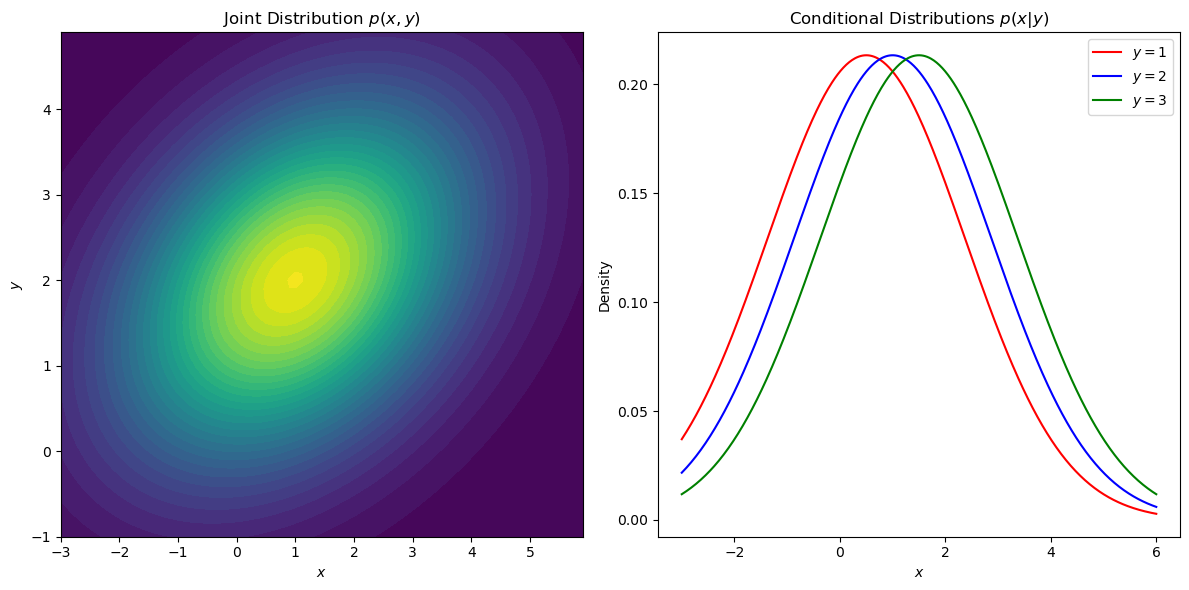

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the parameters of the joint Gaussian distribution
mu_x = 1
mu_y = 2
Sigma = np.array([[4, 1], [1, 2]])

# Conditional distribution parameters for p(x | y)
def conditional_params(y, mu_x, mu_y, Sigma):
    Sigma_xx = Sigma[0, 0]
    Sigma_yy = Sigma[1, 1]
    Sigma_xy = Sigma[0, 1]

    mu_x_given_y = mu_x + Sigma_xy / Sigma_yy * (y - mu_y)
    Sigma_x_given_y = Sigma_xx - Sigma_xy**2 / Sigma_yy

    return mu_x_given_y, Sigma_x_given_y

# Generate grid points for the joint distribution
x, y = np.mgrid[-3:6:.1, -1:5:.1]
pos = np.dstack((x, y))
joint_mean = [mu_x, mu_y]
joint_cov = Sigma
joint_pdf = multivariate_normal(joint_mean, joint_cov).pdf(pos)

# Plot joint distribution
plt.figure(figsize=(12, 6))

# Joint distribution
plt.subplot(1, 2, 1)
plt.contourf(x, y, joint_pdf, levels=30, cmap="viridis")
plt.title("Joint Distribution $p(x, y)$")
plt.xlabel("$x$")
plt.ylabel("$y$")

# Conditional distributions for p(x | y)
y_values = [1, 2, 3]  # Different y values for conditioning
colors = ["red", "blue", "green"]
x_vals = np.linspace(-3, 6, 500)

for i, y_value in enumerate(y_values):
    mu_cond, sigma_cond = conditional_params(y_value, mu_x, mu_y, Sigma)
    cond_pdf = multivariate_normal(mu_cond, sigma_cond).pdf(x_vals)
    plt.subplot(1, 2, 2)
    plt.plot(x_vals, cond_pdf, label=f"$y = {y_value}$", color=colors[i])

# Plot conditional distribution
plt.subplot(1, 2, 2)
plt.title("Conditional Distributions $p(x | y)$")
plt.xlabel("$x$")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()


## Multivariate Gaussian Distribution Marginalization and Schur Complement
The **Schur complement** naturally arises when conditioning a **multivariate Gaussian distribution** because the conditional distribution's mean and covariance depend on the interactions between the variables being conditioned and the rest of the variables. Let’s explore this concept step by step, with an example.

---

### **Multivariate Gaussian Distribution**
A multivariate Gaussian distribution over two sets of random variables $ x $ and $ y $ can be expressed as:

$
\begin{bmatrix}
x \\
y
\end{bmatrix}
\sim \mathcal{N} \left(
\begin{bmatrix}
\mu_x \\
\mu_y
\end{bmatrix},
\begin{bmatrix}
\Sigma_{xx} & \Sigma_{xy} \\
\Sigma_{yx} & \Sigma_{yy}
\end{bmatrix}
\right),
$

where:
- $ \mu_x, \mu_y $: Mean vectors for $ x $ and $ y $,
- $ \Sigma_{xx}, \Sigma_{yy} $: Covariance matrices for $ x $ and $ y $,
- $ \Sigma_{xy}, \Sigma_{yx} = \Sigma_{xy}^T $: Cross-covariance between $ x $ and $ y $.

---

### **Conditional Distribution**
The conditional distribution $ p(x \mid y) $ of $ x $ given $ y $ is also Gaussian:

$
p(x \mid y) \sim \mathcal{N}(\mu_{x \mid y}, \Sigma_{x \mid y}),
$

where:
1. **Conditional Mean**:
   $
   \mu_{x \mid y} = \mu_x + \Sigma_{xy} \Sigma_{yy}^{-1} (y - \mu_y)
   $
   This shifts the mean of $ x $ based on the value of $ y $.

2. **Conditional Covariance**:
   $
   \Sigma_{x \mid y} = \Sigma_{xx} - \Sigma_{xy} \Sigma_{yy}^{-1} \Sigma_{yx}
   $
   This is the Schur complement of $ \Sigma_{yy} $ in the covariance matrix.

---

### **Example**
Let’s take a simple example:

#### Joint Distribution
$
\begin{bmatrix}
x \\
y
\end{bmatrix}
\sim \mathcal{N} \left(
\begin{bmatrix}
\mu_x = 1 \\
\mu_y = 2
\end{bmatrix},
\begin{bmatrix}
4 & 1 \\
1 & 2
\end{bmatrix}
\right).
$

#### Find the Conditional Distribution $ p(x \mid y) $:
1. **Extract Covariance Matrices**:
   $
   \Sigma_{xx} = 4, \quad \Sigma_{yy} = 2, \quad \Sigma_{xy} = 1.
   $

2. **Conditional Mean**:
   Using:
   $
   \mu_{x \mid y} = \mu_x + \Sigma_{xy} \Sigma_{yy}^{-1} (y - \mu_y),
   $
   substitute values:
   $
   \mu_{x \mid y} = 1 + (1)(2^{-1})(y - 2) = 1 + 0.5(y - 2).
   $
   Simplify:
   $
   \mu_{x \mid y} = 0.5y + 0.
   $

3. **Conditional Covariance**:
   Using:
   $
   \Sigma_{x \mid y} = \Sigma_{xx} - \Sigma_{xy} \Sigma_{yy}^{-1} \Sigma_{yx},
   $
   substitute values:
   $
   \Sigma_{x \mid y} = 4 - (1)(2^{-1})(1) = 4 - 0.5 = 3.5.
   $

#### Final Conditional Distribution:
$
p(x \mid y) \sim \mathcal{N}(0.5y, 3.5).
$

---

### **Connection to the Schur Complement**
The conditional covariance $ \Sigma_{x \mid y} = \Sigma_{xx} - \Sigma_{xy} \Sigma_{yy}^{-1} \Sigma_{yx} $ is the **Schur complement** of $ \Sigma_{yy} $ in the joint covariance matrix. This step effectively removes $ y $'s contribution to the covariance, leaving only the "reduced" uncertainty in $ x $ given $ y $.

---

### **Geometric Intuition**
1. The **mean shift** reflects how $ x $ depends on $ y $ (via $ \Sigma_{xy} $).
2. The **reduced covariance** represents the uncertainty in $ x $ after accounting for the known value of $ y $.

In factor graphs, this concept is used in **marginalization** and **conditioning**, where removing variables (e.g., landmarks) or conditioning on measurements (e.g., sensor data) modifies the problem's covariance structure using the Schur complement.

## Gaussian Distributions and Negative Log-Likelihood
Yes, the **negative log-likelihood (NLL)** formulation of Gaussian distributions in SLAM factor graphs directly relates to the **quadratic cost function representation** through the principles of probability and optimization.

Let’s break it down step by step:

---

### **Gaussian Distributions and Negative Log-Likelihood**
In SLAM, factors represent probabilistic constraints between variables (e.g., poses, landmarks). These factors are modeled as Gaussian distributions:

$
p(z \mid x) \propto \exp\left(-\frac{1}{2} \|z - h(x)\|^2_{\Sigma^{-1}}\right),
$

where:
- $ z $: Observation or measurement,
- $ h(x) $: Predicted measurement based on the variable $ x $,
- $ \Sigma $: Covariance matrix of the noise,
- $ \|v\|^2_{\Sigma^{-1}} = v^T \Sigma^{-1} v $: Mahalanobis distance.

The **negative log-likelihood** of this Gaussian factor is:

$
-\log p(z \mid x) = \frac{1}{2} \|z - h(x)\|^2_{\Sigma^{-1}} + \text{constant}.
$

This is the cost associated with the factor and is quadratic in nature.

---

### **Summing Costs in Factor Graphs**
The overall SLAM problem involves minimizing the sum of these negative log-likelihoods for all factors. For a set of variables $ x = \{x_1, x_2, \dots, x_n\} $ and measurements $ z = \{z_1, z_2, \dots, z_m\} $, the total cost is:

$
\text{Cost}(x) = \sum_{i} \frac{1}{2} \|z_i - h_i(x)\|^2_{\Sigma_i^{-1}},
$

which can be written as:

$
\text{Cost}(x) = \frac{1}{2} \|r(x)\|^2,
$

where:
- $ r(x) $: Residual vector,
- $ r(x) = [r_1(x), r_2(x), \dots, r_m(x)] $,
- $ r_i(x) = \Sigma_i^{-1/2} (z_i - h_i(x)) $: Weighted residuals.

This quadratic cost function is what is minimized during SLAM optimization.

---

### **Quadratic Cost Function Representation in Matrix Form**
In matrix form, the SLAM cost can be written as:

$
\text{Cost}(x) = \frac{1}{2} x^T H x - b^T x,
$

where:
- $ H $: Hessian matrix (or the information matrix, $ \sum \Sigma_i^{-1} $),
- $ b $: Gradient vector derived from the residuals and measurements,
- $ x $: State vector containing all variables (robot poses, landmarks, etc.).

The **Hessian matrix** $ H $ and gradient vector $ b $ are built from the contributions of all factors in the graph.

---

### **Connection to Schur Complement**
In marginalization (e.g., removing landmarks), we partition $ x $ into $ x_r $ (robot poses) and $ x_l $ (landmarks). Using the quadratic cost form:

$
\text{Cost}(x) = \frac{1}{2} 
\begin{bmatrix}
x_r \\
x_l
\end{bmatrix}^T
\begin{bmatrix}
H_{rr} & H_{rl} \\
H_{lr} & H_{ll}
\end{bmatrix}
\begin{bmatrix}
x_r \\
x_l
\end{bmatrix}
-
\begin{bmatrix}
b_r \\
b_l
\end{bmatrix}^T
\begin{bmatrix}
x_r \\
x_l
\end{bmatrix}.
$

To marginalize $ x_l $, we use the Schur complement to obtain the reduced cost function for $ x_r $:

$
\text{Reduced Cost}(x_r) = \frac{1}{2} x_r^T (H_{rr} - H_{rl} H_{ll}^{-1} H_{lr}) x_r - (\tilde{b}_r)^T x_r,
$

where $ \tilde{b}_r = b_r - H_{rl} H_{ll}^{-1} b_l $.

---

### **Key Takeaways**
1. **Negative Log-Likelihood**:
   - Each factor contributes a quadratic term based on the Gaussian distribution of measurement noise.
   - The SLAM problem minimizes the sum of these negative log-likelihoods.

2. **Quadratic Cost Function**:
   - The total cost in SLAM optimization is quadratic, represented by the Hessian $ H $ and gradient $ b $.
   - The quadratic form enables efficient computation through linear algebra.

3. **Schur Complement**:
   - When marginalizing variables (e.g., landmarks), the Schur complement reduces the system while preserving the effect of the marginalized variables.

This connection shows how probabilistic modeling, cost functions, and marginalization in SLAM are mathematically unified! Let me know if you'd like specific examples or further details.

